In [1]:
# Raster to polygon 

## Goal 

This segment bring the data from the Dtree to to the tax lot level. This done by using the Tabulate Area fuction that counts the number pixels that for with each tax lot polygon. After that table is joined to the tax lots. Then a new Pool field is added. The pool is cacluated by comparing the number of inground pixels to number of above ground pixels. If there are no pixels then there is no pool. 

## Import normal DATA 

In [2]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display
my_gis = GIS("https://www.arcgis.com/", "rabugel_HC", "Fighton20151!")
my_gis.map()

MapView(layout=Layout(height='400px', width='100%'))

In [3]:
from arcgis.gis import GIS
from arcgis.features import SpatialDataFrame

In [4]:
#Unhandled Error! See the browser console for more info.✕

import arcpy
from arcpy.ia import *
from arcpy.sa import *

In [5]:
arcpy.env.overwriteOutput = True

In [6]:
arcpy.CheckOutExtension("spatial")
arcpy.CheckOutExtension("ImageAnalyst")

'CheckedOut'

In [7]:
arcpy.ImportToolbox(r"c:\program files\arcgis\pro\Resources\ArcToolbox\toolboxes\Data Management Tools.tbx")

<module 'management'>

In [8]:
arcgis_online = GIS("https://www.arcgis.com/", "rabugel_HC", "Fighton20151!")

In [9]:
arcgis.raster.analytics.is_supported(arcgis_online)

True

In [10]:
output = "D:\\SwimmingPoolProject\\data\\output"

### DTree 

This is the tif file from the Dtree segment 

In [11]:
Dtree = arcpy.Raster("D:\\SwimmingPoolProject\\data\\output\\Dtree.tif")

### DTM Digital Tax Map 

The Digital Tax maps show the lot lines, the block and lot numbers, the street names, lot dimensions, and easements.

http://gis.nyc.gov/taxmap/

In [12]:
DTM = (r"D:\SwimmingPoolProject\data\shp\Digital_Tax_Map_20200403\DTM_Tax_Lot_Polygon.shp")

In [13]:
DTM

'D:\\SwimmingPoolProject\\data\\shp\\Digital_Tax_Map_20200403\\DTM_Tax_Lot_Polygon.shp'

## Setup the Enviroment

In [22]:
# Model Environment settings
    with arcpy.EnvManager(scratchWorkspace=r"D:\SwimmingPoolProject\SP_PoolProject\SP_PoolProject.gdb", workspace=r"D:\SwimmingPoolProject\SP_PoolProject\SP_PoolProject.gdb"):
        DTM_Tax_Lot_Polygon = DTM
        Dtree_tif = arcpy.Raster(Dtree)
        SP_PoolProject_gdb = "D:\\SwimmingPoolProject\\SP_PoolProject\\SP_PoolProject.gdb"

### Filter for only Staten Island BBLs 

In [23]:
# Process: Select (Select) (analysis)
        DTM_si = "D:\\SwimmingPoolProject\\SP_PoolProject\\SP_PoolProject.gdb\\DTM_si1"
        arcpy.analysis.Select(in_features=DTM_Tax_Lot_Polygon, out_feature_class=DTM_si, where_clause="BORO = '5'")


<Result 'D:\\SwimmingPoolProject\\SP_PoolProject\\SP_PoolProject.gdb\\DTM_si1'>

### Tabulate Area 

Here we are counting the number of each pixel that fall in each polygon. 

https://pro.arcgis.com/en/pro-app/tool-reference/spatial-analyst/tabulate-area.htm

In [26]:
# Process: Tabulate Area (Tabulate Area) (sa)
Tabulat_DTM_SI2 = "D:\\SwimmingPoolProject\\data\\output\\Tabulat_DTM_SI2"
arcpy.sa.TabulateArea(in_zone_data=DTM_si, zone_field="BBL", in_class_data=Dtree_tif, class_field="VALUE", out_table=Tabulat_DTM_SI2, processing_cell_size="D:\\SwimmingPoolProject\\data\\output\\Dtree.tif", classes_as_rows="CLASSES_AS_FIELDS")


<geoprocessing server result object at 0x170c2df4b70>

In [27]:
# Process: Add Join (Add Join) (management)
DTM_si_Layer1 = arcpy.management.AddJoin(in_layer_or_view=DTM_si, in_field="BBL", join_table=Tabulat_DTM_SI2, join_field="BBL", join_type="KEEP_ALL")[0]


### Adding the pool field 

In [28]:
# Process: Add Field (Add Field) (management)
DTM_SI_3_ = arcpy.management.AddField(in_table=DTM_si_Layer1, field_name="Pools", field_type="TEXT", field_precision=None, field_scale=None, field_length=None, field_alias="", field_is_nullable="NULLABLE", field_is_required="NON_REQUIRED", field_domain="")[0]

This only works in model builder. Still working on 

In [29]:

        # Process: Calculate Field (Calculate Field) (management)
        with arcpy.EnvManager(scratchWorkspace=r"D:\SwimmingPoolProject\SP_PoolProject\SP_PoolProject.gdb", workspace=r"D:\SwimmingPoolProject\SP_PoolProject\SP_PoolProject.gdb"):
            DTM_si_Layer = arcpy.management.CalculateField(in_table=DTM_SI_3_, field="Pools", expression="when(($feature['Tabulat_DTM_SI2.VALUE_3'] < $feature['Tabulat_DTM_SI2.VALUE_4']), \"inground\", ($feature['Tabulat_DTM_SI2.VALUE_3'] > $feature['Tabulat_DTM_SI2.VALUE_4']) ,\"aboveground\", \"NoPool\")", expression_type="ARCADE", code_block="def ifelse(!Tabulat_DTM_SI1.VALUE_3!, !Tabulat_DTM_SI1.VALUE_4!):
    if !Tabulat_DTM_SI1.VALUE_3! > !Tabulat_DTM_SI1.VALUE_4!:
        return \"inground\"
    elif !Tabulat_DTM_SI1.VALUE_3! < !Tabulat_DTM_SI1.VALUE_4!:
        return \"aboveground\"
    else:
        return nopool", field_type="TEXT")[0]

SyntaxError: EOL while scanning string literal (<ipython-input-29-39de79d525af>, line 3)

In [33]:
DTM_si_Layer = arcpy.management.CalculateField(in_table = DTM_SI_3_, field = "Pools", expression = "$feature['Tabulat_DTM_SI2.VALUE_3']", "ARCADE")

SyntaxError: positional argument follows keyword argument (<ipython-input-33-765967fa49dd>, line 1)

In [ ]:
###End product 

Finnish product is a shapefile that has NoPool, aboveground, inground fields. These can then be used to see there impact on market value after some data cleaning. 

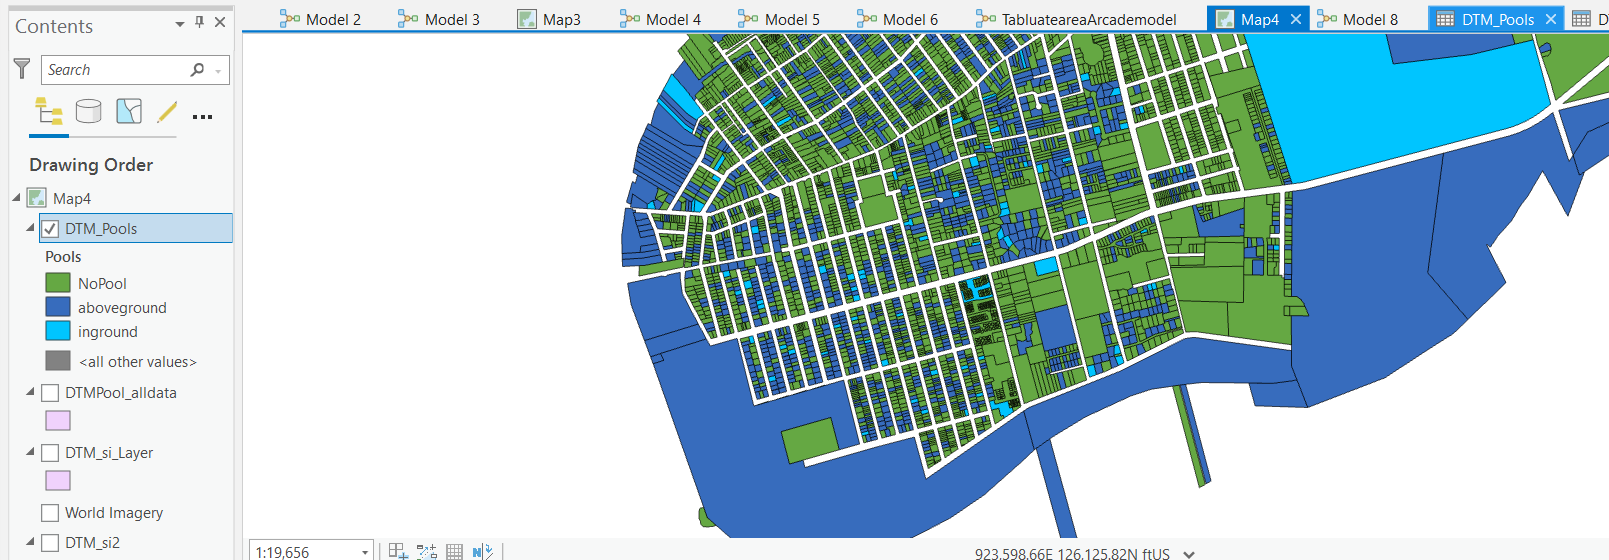

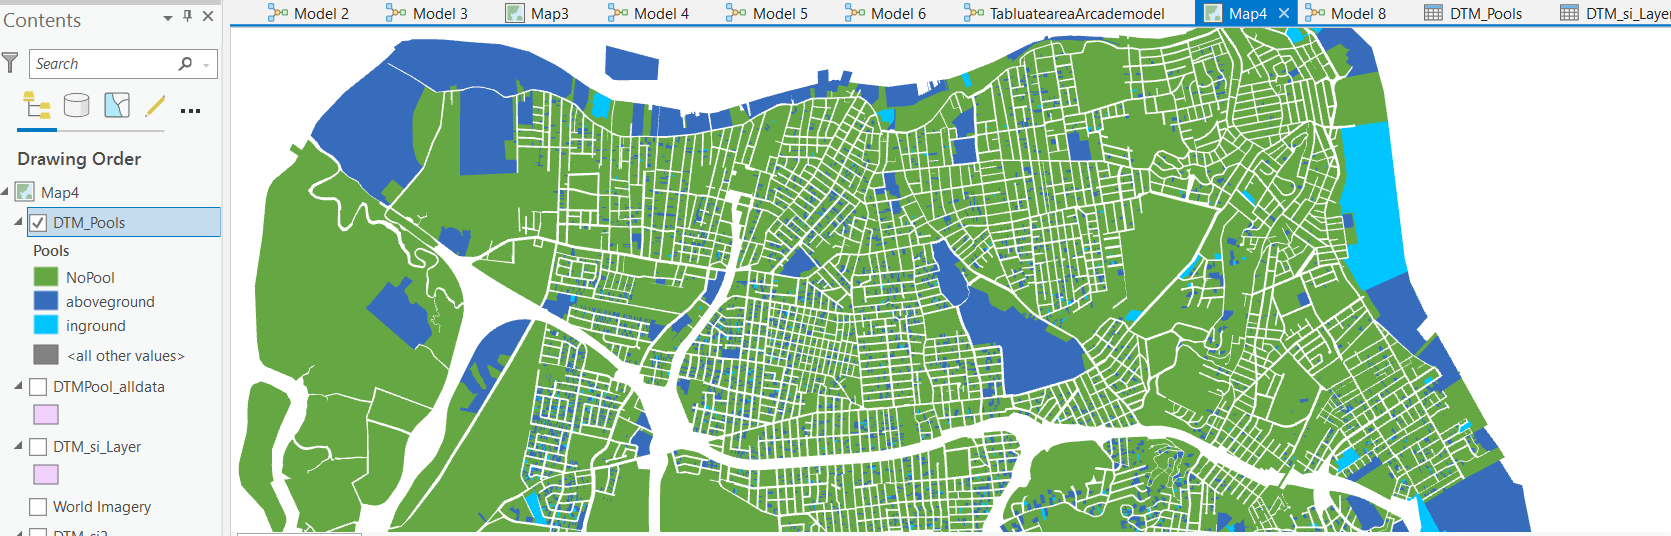